In [2]:
%load_ext autoreload
%autoreload 1

# Clustering

Run this section using ```spherecluster``` env

## Demo

In [2]:
import pickle

start_year = 1950
end_year = 1959
d = 100
w = 10

with open(f'../../data/decades/{start_year}_to_{end_year}/VIDs_{d}feat_{w}context_win_size.pkl', 
          'rb') as f:
        VIDs = pickle.load(f)

with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
        vectors = pickle.load(f)

In [4]:
from spherecluster import VonMisesFisherMixture
K = 26
vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
vmf_hard.fit(vectors)

/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


VonMisesFisherMixture(copy_x=True, force_weights=None, init='random-class',
           max_iter=300, n_clusters=26, n_init=10, n_jobs=1,
           normalize=True, posterior_type='hard', random_state=None,
           tol=1e-06, verbose=False)

In [6]:
vmf_hard.labels_

array([24., 24.,  5., ...,  3., 10., 18.])

In [10]:
vmf_hard.cluster_centers_

array([[-0.02536224,  0.05834802,  0.09436964, ..., -0.26021897,
        -0.07516032, -0.0265524 ],
       [ 0.18344244,  0.04394991,  0.0201354 , ..., -0.07530757,
        -0.02505317, -0.06111693],
       [ 0.09488648,  0.03388972,  0.07732126, ..., -0.04086915,
         0.00894189,  0.00271343],
       ...,
       [ 0.05114527, -0.03031565, -0.06258504, ..., -0.13360498,
         0.08040952, -0.00753947],
       [-0.00095778,  0.08270476,  0.14501849, ..., -0.09827794,
        -0.09393919,  0.03311429],
       [ 0.0016818 , -0.03820678,  0.04429099, ..., -0.2287281 ,
         0.00208398, -0.13259435]])

## Loop

In [14]:
import pickle
from spherecluster import VonMisesFisherMixture
d, w = 100, 10
K = 26

for start_year, end_year in zip([1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                [1959, 1969, 1979, 1989, 1999, 2009, 2021]):
    print(f'working on {start_year}s')
    with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
           vectors = pickle.load(f)
    vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
    vmf_hard.fit(vectors)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
            'wb') as f:
           pickle.dump(vmf_hard.labels_,f)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
                'wb') as f:
            pickle.dump(vmf_hard.cluster_centers_, f)
    print(f'finish dumping {start_year}s')

working on 1950s


/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


finish dumping 1950s
working on 1960s
finish dumping 1960s
working on 1970s
finish dumping 1970s
working on 1980s
finish dumping 1980s
working on 1990s
finish dumping 1990s
working on 2000s
finish dumping 2000s
working on 2010s
finish dumping 2010s


# Analysis

Run this section using any env with ```p2v```

## Demo

In [5]:
import sys
sys.path.append('diachronic-p2v')

%aimport p2v
model = p2v.P2V()

data_dir:  /mnt/d/projects/diachronic-p2v/data
2024-11-16 13:01:34 -- start loading Mag_venue_info_df
2024-11-16 13:01:35 -- finish.
2024-11-16 13:01:35 -- start loading labeled_journal_info_df
2024-11-16 13:01:35 -- finish.


In [38]:
import pickle

start_year, end_year = 1950, 1959
d, w = 100, 10

wv = model.load_wv(start_year, end_year, d, w)
all_VIDs = wv.index_to_key
all_vectors = wv.get_normed_vectors()
VIDs_labeled = model.load_VID_labeled(start_year, end_year, d, w)

with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        vmf_labels = pickle.load(f)
with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        cluster_centers = pickle.load(f)

2024-11-16 13:27:37 -- start loading word vectors...
2024-11-16 13:27:37 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-16 13:27:37 -- start loading VID_labeled...
2024-11-16 13:27:37 -- finish.


In [ ]:
len(all_VIDs)
len(VIDs_labeled['VID'])
len(vmf_labels)

1645

In [39]:
valid_VID_idx = [VIDs.index(vid) for vid in VIDs_labeled['VID']]
len(valid_VID_idx)

1253

In [29]:
import pandas as pd

cluster_df = pd.DataFrame({'VID': [VIDs[idx] for idx in valid_VID_idx], 
                           'Scopus_label': VIDs_labeled['label'],
                           'cluster_label': [vmf_labels[idx] for idx in valid_VID_idx]})

In [32]:
from clusim.clustering import Clustering
import clusim.sim as sim

# Key: row index, val: value of 'area' column
dict_original = {index: [row['Scopus_label']] for index, row in cluster_df.iterrows()}
# Key: row index, val: value of 'cluster_label' column
dict_clustering = {index: [row['cluster_label']] for index, row in cluster_df.iterrows()}

c_original = Clustering(elm2clu_dict = dict_original)
c_clustering = Clustering(elm2clu_dict = dict_clustering)

elementScores, relabeled_elements = sim.element_sim_elscore(c_original, c_clustering, alpha = 0.9)
cluster_df['sim_score'] = elementScores

In [42]:
import numpy as np

vectors = all_vectors[valid_VID_idx]
distances = 1 - np.dot(vectors, cluster_centers.T)
closest_center_distances = np.min(distances, axis=1)
cluster_df['closest_center_distance'] = closest_center_distances


In [43]:
cluster_df

,VID,Scopus_label,cluster_label,sim_score,closest_center_distance
0,1.377736e+08,Multidisciplinary,18.0,0.065789,0.422928
1,1.402520e+08,"Biochemistry, Genetics and Molecular Biology",5.0,0.185714,0.253940
2,1.111554e+08,"Biochemistry, Genetics and Molecular Biology",5.0,0.185714,0.248420
3,5.486237e+07,Physics and Astronomy,0.0,0.666667,0.155218
4,3.880285e+06,Multidisciplinary,18.0,0.065789,0.437083
...,...,...,...,...,...
1248,1.079145e+08,Social Sciences,12.0,0.186992,0.073006
1249,1.769740e+08,Arts and Humanities,12.0,0.574074,0.108681
1250,2.764621e+09,Agricultural and Biological Sciences,2.0,0.177215,0.096499
1251,2.483219e+09,Agricultural and Biological Sciences,2.0,0.177215,0.106651


<Axes: xlabel='sim_score', ylabel='Count'>

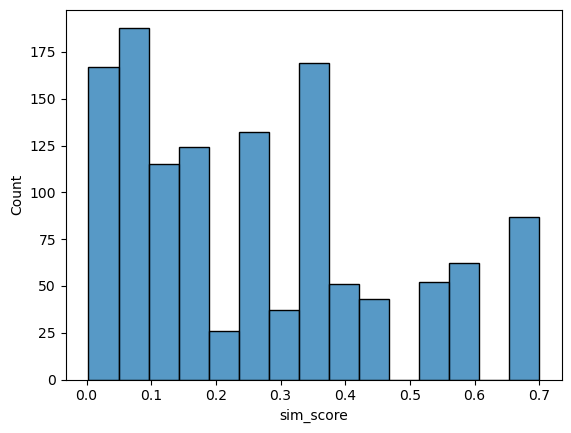

In [45]:
import seaborn as sns

sns.histplot(cluster_df.sim_score)

<Axes: xlabel='closest_center_distance', ylabel='Count'>

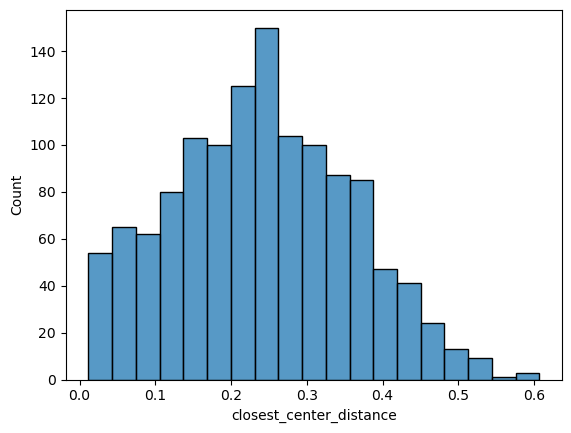

In [46]:
sns.histplot(cluster_df.closest_center_distance)

In [51]:
wv_2d = model.load_wv_2d(start_year, end_year, d, w)
len(wv_2d['VID'])

2024-11-16 13:35:40 -- start loading wv_2d...
2024-11-16 13:35:40 -- finish.


1645